# Project: Köşe Kapmaca


## Brief project definition


- Each group submit a group_name.py file, exactly one of the names that is defined below in ```group_names``` list.
- the file should be self sufficient and one we import it, we should be able to create an instance of your solver/player
- external dependencies should be PIP installable and included in your ```group_name.py``` file
- a template file is given as [ME461Group.py](https://raw.githubusercontent.com/bugrakoku/classypy/main/ME461Group.py), you can edit this file and save it properly and submit it. As of now it is a random player.

Tournament: count down from 301  

When tournament starts a maze image (nxmx3 tensor) will be given to your function named ```solverobject.run(img, info)``` where ```info``` is a dictionary where group names are the keys and values contain location of each robot and remaining points that robot has to reach down to 0.

Your function should return a list of points ```[(),(),...]``` where your current point is not included in this list, the first point is the first point you want to reach.  
Fasters execution time will get N pixel travel at max. Therefore the total length of the path in your list should be N. Fastest code will move upto N, and the slowest N/2.

Corridors and bases are in 50 pixels in size.

After calling the ```solverobject.run()``` function for all groups, system will update the locations based on exeution times, if a base is taken by a robot, update the robots points, locate it randomly around that base and turn the base to a wall, where walls are not bases. 

- if all bases are taken, i.e. no points left on the game board or points do not change for 12 steps, the whoel maze will be refreshed with a new board.
- you should be ready to play alone, against one opponent or against everyone
- points for colors and how many of them there will be in the maze are in the list ```colorz```, this will not change: bases will have points in between [1,...,9] x 3, [10, 20, 30, 50] x 2
, [100] x 1 where the rest will be just black with 0 points
- when a base is taken by a player, that base will turn black
- black bases are NOT walls, you can pass through them, but you will not get any points
- if your point drops below 0, you are out of the game as a [**loser**](https://youtu.be/_xEcC6ULakE?t=11)
- The player that gets 0 first is the winner, rest will be sorted based on remaining points.

Check out the following implementation and make a copy of this notebook and test your implementation with the updated version of this notebook.  

The following is mostly complete but does not end the game one someone hits zero for the first time. This is left on purpose but will change during the games.  

If you spot bugs, please [report it here](https://odtuclass2021f.metu.edu.tr/mod/forum/discuss.php?d=27672)



# Let's get started with coding

## Start with imports

In [ ]:
import numpy as np
import random


Number of processors:  2


## get library files

In [ ]:
# get dummy player
!rm *.py 2> dumpy

!wget https://raw.githubusercontent.com/bugrakoku/classypy/main/ME461Group.py
import ME461Group as dumpy
!wget https://raw.githubusercontent.com/bugrakoku/classypy/main/ME4612021Fproject.py
from ME4612021Fproject import *

--2022-02-15 16:07:56--  https://raw.githubusercontent.com/bugrakoku/classypy/main/ME461Group.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2063 (2.0K) [text/plain]
Saving to: ‘ME461Group.py’

ME461Group.py       100%[===================>]   2.01K  --.-KB/s    in 0s      

2022-02-15 16:07:56 (40.6 MB/s) - ‘ME461Group.py’ saved [2063/2063]

--2022-02-15 16:07:57--  https://raw.githubusercontent.com/bugrakoku/classypy/main/ME4612021Fproject.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19539 (19K) [text/plain]
Saving to: 

In [ ]:
from ducati import *

# START The GAME: generate users and intialize them 
the following seciton is for demostration purposes as of now, during evaluation, the dummy player will be replaced with instances of your class.  

Start by setting up the board for a brand new game

8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
	GROUP IDS and STARTING LOCATIONS 
8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
    ducati ID = 1, starting from (25, 175)



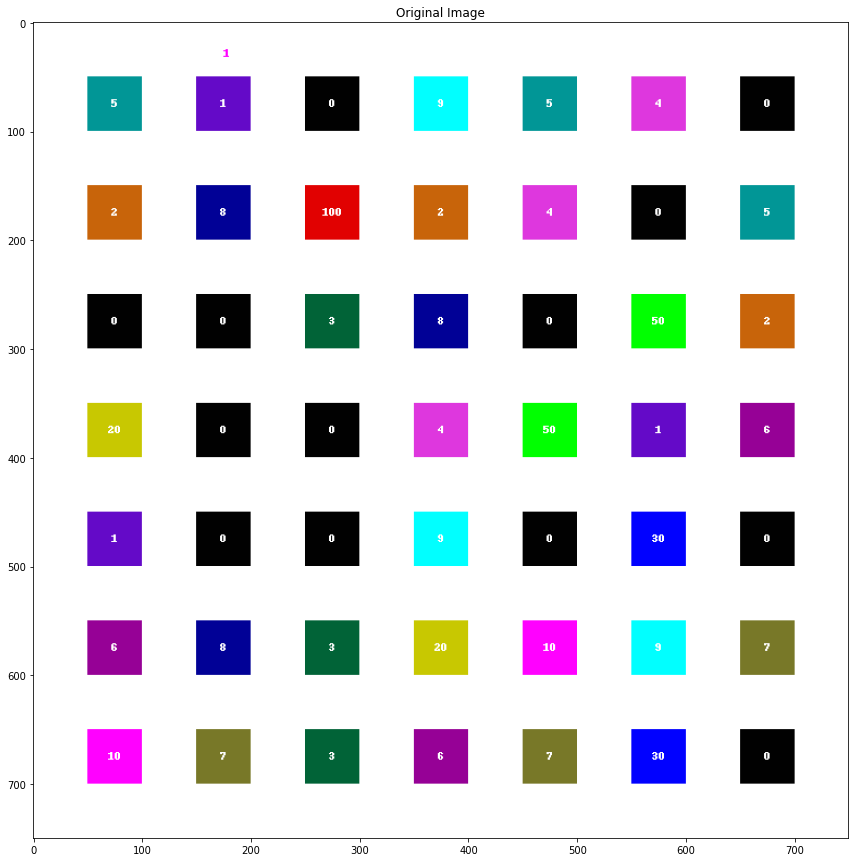

In [ ]:
# initial points in the game for each player
Pinit = 301
# groups names
group_names = ['atlas', 'backspacex', 'ducati', 'hepsi1', 'mechrix', 'meturoam', 'nebula', 'ohmygroup', 'tulumba']
group_names = ['ducati'] 
Players = {}
playerID = [x for x in range(len(group_names))] # generate player IDs
random.shuffle(playerID) # shuffle player order

# set default player locations, note that playerIDs are randomly ordered
initLocs = [(25, 175),(25, 375),(25, 575),(175, 25),(375, 25),(575, 25),(175, 725),(375, 725),(575, 725)]
# a summary of the players
legend = f'{12*"8<--"}\n\tGROUP IDS and STARTING LOCATIONS \n{12*"8<--"}\n'

# generate players
for gInd, gName in enumerate(group_names):
    player = ducati(gName, colorz, maxStep, maxTime) # set the name, color and max step size for the current player
    # keep record of player object, player ID, a history list, their current location and current points
    Players[gName] = [player, playerID[gInd]+1, [], initLocs[playerID[gInd]], Pinit]

# genereate a new game for these players
aGame = LetsPlayAGame(Players, initLocs, nCorr, colorz, imSize, digits, maxStep) 

# the game should be set up, let's plot an informative version of the game board
for gInd, gName in enumerate(Players.keys()):
    aGame.aMaze.DrawPolyLine(aGame.pmaze, [initLocs[Players[gName][1]-1]], header = digits[Players[gName][1]] )
    legend +=f'{"{0: >10}".format(gName)} ID = {playerID[gInd]+1}, starting from {initLocs[playerID[gInd]]}\n'

# set figures to plot larger than default
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(aGame.pmaze)
plt.title('Original Image')
# finally print the legend
print(legend)
ormaze = aGame.pmaze.copy()
# in case you want a movie, clear frame images first
!rm frame*.png 2>>dumpy
# number of nowin sessions
numNoWin = 0

## Play a single game step


[(25, 175), 301]
0 3
0
109
[75, 175]
[125, 175]
[175, 175]
[175, 225]
[175, 275]
0.032317942999725346:0.032317942999725346


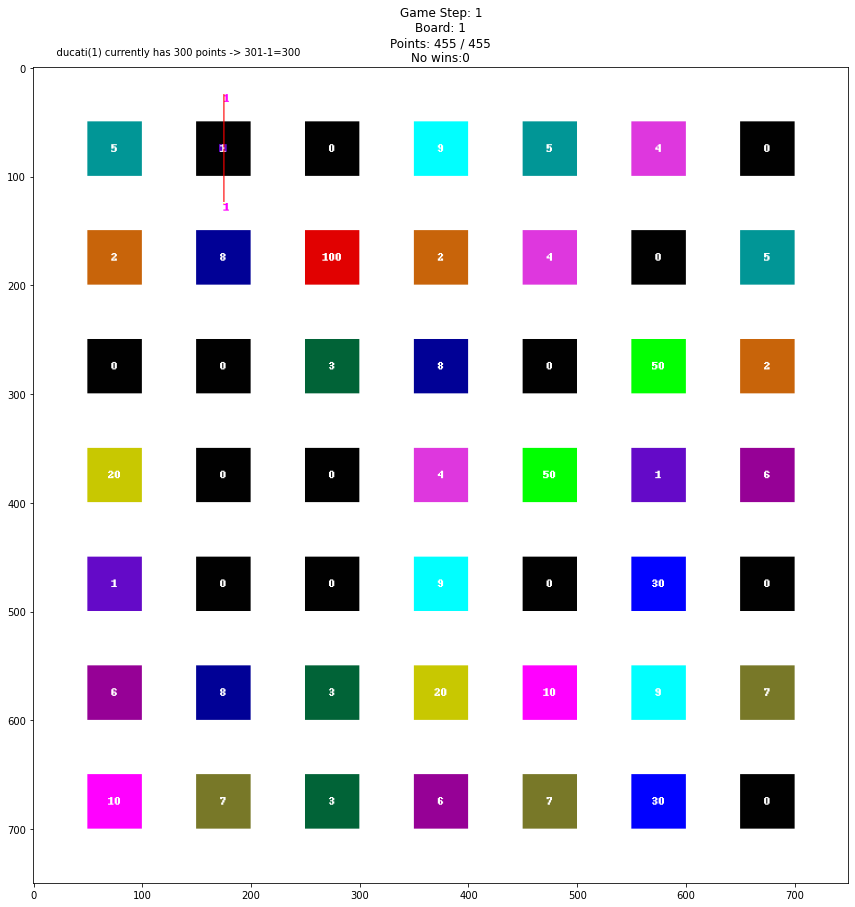

In [ ]:
debugMode = False
numMaxNoPlay = 12
win, summary = aGame.PlayAStep(debugMode)

if win == []: # oops
    print(summary)
else:
    # perf contains time performance data
    if len(win.keys()) == 0:
        numNoWin += 1
    else: # reset no win counter
        numNoWin = 0
    # display results
    plt.rcParams["figure.figsize"] = (20,15)
    plt.imshow(aGame.pmaze)
    plt.text(10,10,summary+'\n')
    plt.title(f'Game Step: {aGame.numSteps}\nBoard: {aGame.numBoards}\nPoints: {TotalPoints()} / {aGame.aMaze.RemainingPoints()}\nNo wins:{numNoWin}')
    plt.savefig(f'frame{aGame.numSteps-1}.png')
  
    

    if numNoWin >= numMaxNoPlay or  aGame.aMaze.RemainingPoints() == 0: # then we need a new game
        if  aGame.aMaze.RemainingPoints() == 0:
            print('No bases left, board will be reset')
        else:
            print('Too many no win games, resetting board next time')
        aGame.ResetBoard()
        numNoWin = 0




# Save the game as an mp4 if desired

In [ ]:
import moviepy.video.io.ImageSequenceClip

def SaveMovie(frames, fps, filename):
    clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(frames, fps=fps)
    #moviepy.video.io.ImageSequenceClip.VideoClip()
    clip.write_videofile(filename)

frames= []
for i in range(aGame.numSteps):
    frames.append(f'frame{i}.png')
SaveMovie(frames, 3, 'test.mp4')
!ls -alh *.mp4

[MoviePy] >>>> Building video test.mp4
[MoviePy] Writing video test.mp4


100%|██████████| 19/19 [00:01<00:00, 14.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test.mp4 

-rw-r--r-- 1 root root 42K Feb 13 12:47 test.mp4
